In [ ]:
# Kalkidan Yibeltal Mulat 
# mdm991

## Lab B

Lab 6 B works with natural language processing through conducting a sentiment analysis on text data.

This exercise is to examine customer review data on airlines around the world and compare the reviews across major world airlines across Business Class, and Economy Class. We will not include First Class and Premium Economy as part of this analysis. We will compare the findings between the text-based reviews and the score-based reviews.

We will be using Skytrax (http://airlineequity.com) data scraped and wrangled by @Efehan on Kaggle (https://www.kaggle.com/efehandanisman/skytrax-airline-reviews). The CSV file has been provided for you. 

**Tasks**

1. Read ```capstone_airline_reviews3.csv``` into a Pandas dataframe. Note that this CSV file has blank lines that you will need to remove within the code. 

2. Analyze the data such that you can find the average polarity of all reviews for each airline's business class and economy class products. From the CSV file you, you will use the ```airline```, ```customer_review```, and ```cabin``` for this analysis. You are conducting a sentiment analysis (polarity only) on the ```customer_review``` data. Only include airlines that have more than 100 reviews for Business Class and more than 200 reviews for Economy Class and more than 500 reviews total. <em>There will only be 29 airlines that meet all three requirements.</em> You should create a new ```DataFrame``` that holds the airline name, the average polarity for their business class reviews, and average polarity for their economy class reviews.
3. Plot a scatter plot to compare the ratings with x-axis for the average polarity values for Economy Class and the y-axis for the average polarity values for Business Class. Each dot on the scatter plot represents an airline. The size of the scatter plot should be related to the number of reviews the airline has. 
4. Select one airline and create a word cloud for each of its' business class, economy class, and all its reviews. The phrase ```âœ… Trip Verified |``` appears in front of every review, remove it. Then, conduct a visual analysis of what the most common words were in customers' reviews.
5. Answer the questions below. 

In [64]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

df = pd.read_csv( 'capstone_airline_reviews3.csv' )

In [65]:
# filter the airlines with no empty row, business > 100 and economy > 200 and total > 500 
# you dont need new data frame for this 
# of those airlines loop throug and find the polarity from the customer_review column 
# new data frame with airline name, polarity for both business and economy class 


In [66]:
df.columns 

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [67]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# filter rows with nan on the ['airline', 'customer_review', 'cabin'] columns 
df = df.dropna(subset= ['airline', 'customer_review', 'cabin'])

In [69]:
# count the number of revies in each cabin 
# How many reviews does each airline have in each cabin?
# we need to group by cabin and airline then count
# to make it easy to understand Unstack transforms one level of the index into columns
# because groupby creates multi-level index
df_count = df.groupby(['airline','cabin']).size().unstack(fill_value=0)
df_count.head()

cabin,Business Class,Economy Class,First Class,Premium Economy
airline,,,,
ANA All Nippon Airways,119,313,13,16
Adria Airways,10,52,0,0
Aegean Airlines,78,441,1,2
Aer Lingus,73,628,0,2
Aeroflot Russian Airlines,67,413,0,15


In [70]:
# since we need the total numeber of review we need to add them horizontally and put it in a column named total 
df_count['Total'] = df_count.sum(axis=1)
df_count.head()

cabin,Business Class,Economy Class,First Class,Premium Economy,Total
airline,,,,,
ANA All Nippon Airways,119,313,13,16,461
Adria Airways,10,52,0,0,62
Aegean Airlines,78,441,1,2,522
Aer Lingus,73,628,0,2,703
Aeroflot Russian Airlines,67,413,0,15,495


In [71]:
# now that we have the information we need to filter and get list( index object) of the airlines names so we can filter the original dataframe accordingly 
airline_names = df_count[(df_count['Total']>499) & 
                    (df_count['Business Class']>99)&
                    (df_count['Economy Class']>199)].index


In [72]:
print(airline_names)


Index(['Air Canada', 'Air China', 'Air France', 'Air India', 'Air New Zealand',
       'American Airlines', 'British Airways', 'Cathay Pacific Airways',
       'China Eastern Airlines', 'China Southern Airlines', 'Delta Air Lines',
       'EVA Air', 'Emirates', 'Etihad Airways', 'Finnair', 'Garuda Indonesia',
       'Iberia', 'KLM Royal Dutch Airlines', 'Lufthansa', 'Qantas Airways',
       'Qatar Airways', 'SAS Scandinavian', 'Singapore Airlines',
       'Swiss Intl Air Lines', 'TAP Portugal', 'Thai Airways',
       'Turkish Airlines', 'United Airlines'],
      dtype='object', name='airline')


In [74]:
# filter the dataframe and keep only airlines in the airline_names list 
df_clean = df[df['airline'].isin(airline_names)]
df_clean.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,1.0,1.0,1.0,1.0,1.0,1.0,no


In [44]:
# filter those with the right number of economy and business class 
# first filter thoes that have cabin with economy and business class 
# these columns can't be nan since we will use those to sentiment analysis
df_clean = df.dropna(subset=['airline', 'customer_review', 'cabin'])

# Step 3: Filter only Business and Economy Class reviews
df_filtered = df_clean[df_clean['cabin'].isin(['Business Class', 'Economy Class'])]

# Step 4: Count reviews per airline and cabin
review_counts = df_filtered.groupby(['airline', 'cabin']).size().unstack(fill_value=0)

# Count total reviews per airline
review_counts['total'] = review_counts.sum(axis=1)

# Step 5: Keep airlines meeting the thresholds
valid_airlines = review_counts[
    (review_counts.get('Business Class', 0) > 100) &
    (review_counts.get('Economy Class', 0) > 200) &
    (review_counts['total'] > 500)
].index

df_valid = df_filtered[df_filtered['airline'].isin(valid_airlines)]

df_valid.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,1.0,1.0,1.0,1.0,1.0,1.0,no


In [80]:
# to find the plority define the function
def get_polarity(text):
    return TextBlob(str(text)).sentiment.polarity

In [85]:
# apply the function to each row in the filtered data frame 
df_valid = df_clean[df_clean['airline'].isin(valid_airlines)].copy()
df_valid['polarity'] = df_valid['customer_review'].apply(get_polarity)


In [ ]:
# so now we have the polarity of each customer review let's find the average 
# we need to group it then chose the column we want to do math on then unstack it 
avg_polarity = df_valid.groupby(['airline', 'cabin'])['polarity'].mean().unstack
# this is important distniction as it is first group by then the mean is calculated on different column

In [91]:
# find the average polarity 
avg_polarity = df_valid.groupby(['airline', 'cabin'])['polarity'].mean().unstack()
avg_polarity.head()

cabin,Business Class,Economy Class,First Class,Premium Economy
airline,,,,
Air Canada,0.175843,0.065094,0.143515,0.128105
Air China,0.108017,0.033737,0.198360,-0.029820
Air France,0.169177,0.106585,0.253051,0.129793
Air India,0.103565,0.104192,0.078575,0.004889
Air New Zealand,0.242324,0.113985,NaN,0.218996


In [96]:
# Plot a scatter plot to compare the ratings with x-axis for the average polarity values for Economy
# Class and the y-axis for the average polarity values for Business Class. Each dot on the scatter plot 
# represents an airline.The size of the scatter plot should be related to the number of reviews the airline has
# before we start plotting since we are gonna use the avg_polarity dataframe we need to make sure it has the total number of revies as the size of the scatter plot will depend on it 
# to do that we need to find the total number of review from the previous dataframe 
total_review = df_valid.groupby(['airline']).size()
total_review.head()

airline
Air Canada         1250
Air China          1314
Air France          897
Air India          1366
Air New Zealand     595
dtype: int64

In [103]:
# add this to the avg_polarity dataframe
plot_df = avg_polarity.merge(total_review.rename('total_reviews'),
    left_on='airline',
    right_index=True
)
plot_df.head()

,Business Class,Economy Class,First Class,Premium Economy,total_reviews
airline,,,,,
Air Canada,0.175843,0.065094,0.143515,0.128105,1250
Air China,0.108017,0.033737,0.198360,-0.029820,1314
Air France,0.169177,0.106585,0.253051,0.129793,897
Air India,0.103565,0.104192,0.078575,0.004889,1366
Air New Zealand,0.242324,0.113985,NaN,0.218996,595


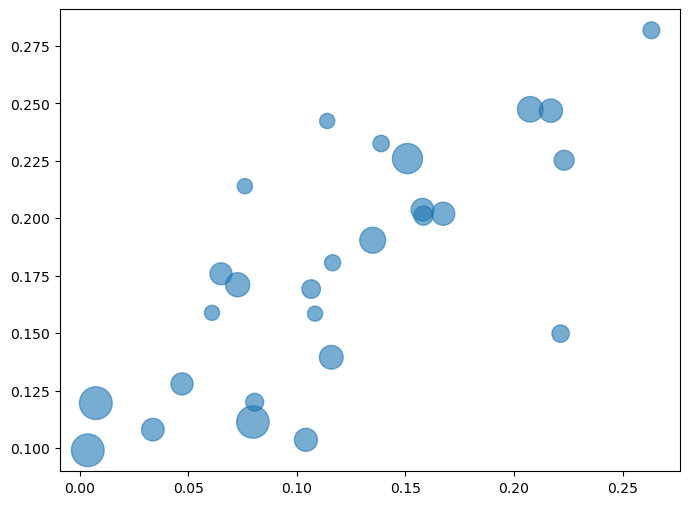

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Scatter plot
plt.scatter(
    x=plot_df['Economy Class'],  # x-axis
    y=plot_df['Business Class'], # y-axis
    s=plot_df['total_reviews']/5,  # size of the dot (adjust scale as needed)
    alpha=0.6  # transparency
)



In [109]:
plot_df.columns
plot_df = plot_df.reset_index()
plot_df.columns

Index(['airline', 'Business Class', 'Economy Class', 'First Class',
       'Premium Economy', 'total_reviews'],
      dtype='object')

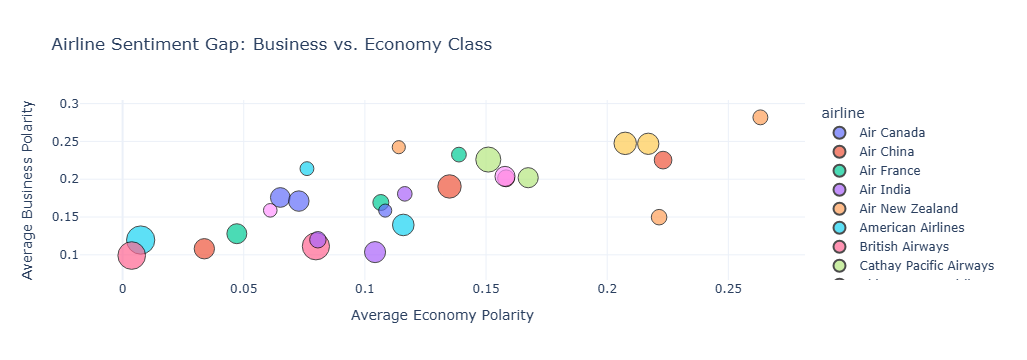

In [119]:
import plotly.express as px

# Create the interactive bubble chart
fig = px.scatter(
    final_df.reset_index(), 
    x='Economy_Polarity', 
    y='Business_Polarity',
    size='Total_Count',       
    color='airline',          
    hover_name='airline',     
    hover_data={
        'Economy_Polarity': ':.3f', 
        'Business_Polarity': ':.3f', 
        'Total_Count': True
    },
    title='Airline Sentiment Gap: Business vs. Economy Class',
    labels={
        'Economy_Polarity': 'Average Economy Polarity',
        'Business_Polarity': 'Average Business Polarity'
    },
    template='plotly_white'    
)

# Set the overall transparency of the bubbles here instead
fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='Black')))

# Show the plot
fig.show()

In [ ]:
'''
4. Select one airline and create a word cloud for each of its' business class, economy class,
and all its reviews. The phrase ```âœ… Trip Verified |``` appears in front of every review, 
remove it. Then, conduct a visual analysis of what the most common words were in customers' reviews.
'''

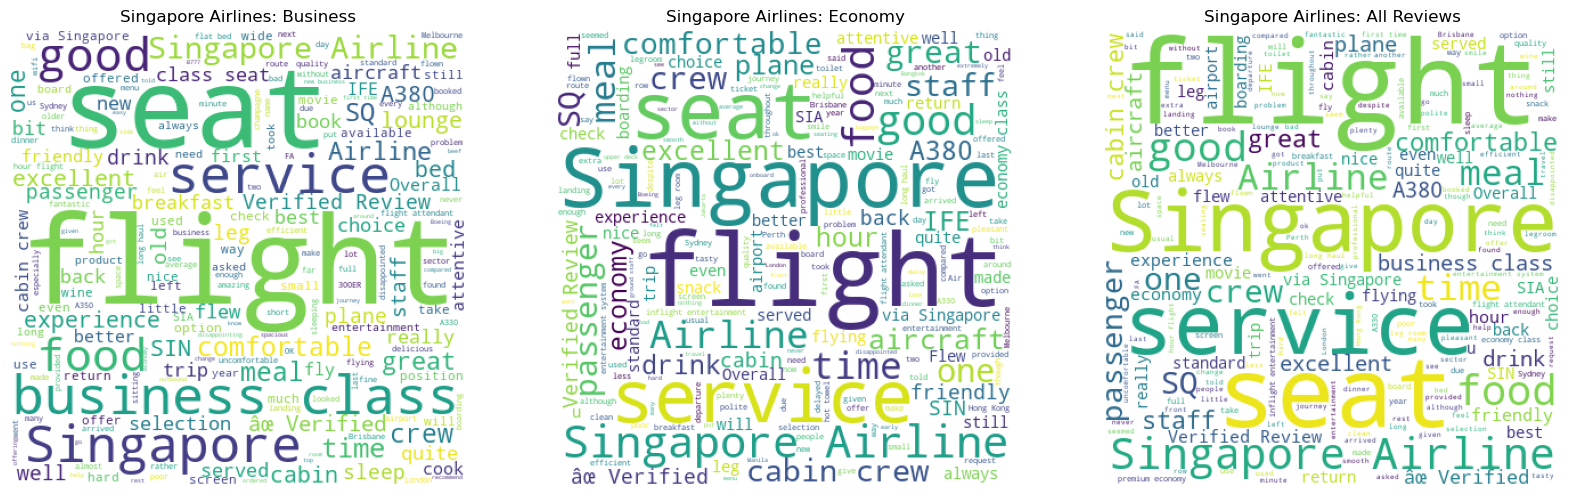

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Filter the data for Singapore Airlines
sa_df = df[df['airline'] == 'Singapore Airlines'].copy()

# 2. Clean the " Trip Verified |" phrase as required
# We replace the weird characters 'âœ…' that sometimes show up in CSVs too
sa_df['customer_review'] = sa_df['customer_review'].str.replace('✅ Trip Verified |', '', regex=False)
sa_df['customer_review'] = sa_df['customer_review'].str.replace('âœ… Trip Verified |', '', regex=False)

# 3. Create the text blocks for each category
text_bus = " ".join(sa_df[sa_df['cabin'] == 'Business Class']['customer_review'])
text_eco = " ".join(sa_df[sa_df['cabin'] == 'Economy Class']['customer_review'])
text_all = " ".join(sa_df['customer_review'])

# 4. Generate and Plot the Word Clouds
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Business Class Cloud
wc_bus = WordCloud(width=400, height=400, background_color='white').generate(text_bus)
axes[0].imshow(wc_bus)
axes[0].set_title('Singapore Airlines: Business')
axes[0].axis('off')

# Economy Class Cloud
wc_eco = WordCloud(width=400, height=400, background_color='white').generate(text_eco)
axes[1].imshow(wc_eco)
axes[1].set_title('Singapore Airlines: Economy')
axes[1].axis('off')

# All Reviews Cloud
wc_all = WordCloud(width=400, height=400, background_color='white').generate(text_all)
axes[2].imshow(wc_all)
axes[2].set_title('Singapore Airlines: All Reviews')
axes[2].axis('off')

plt.show()

## Questions

1. According your scatter plots, describe and explain the relationship of sentiment from customer's text-based reviews, through the the polarity measures, between an airline's economy class versus its business class products. Describe the statistical significance, if any, in sentiment between an airline's economy class versus its business class products.

2. Based on all the data, what airline would you primarily fly if you had to alternate between flying business and economy class? What airline would you avoid? Why?

## Responses

Enter your responses here.

If I would choose china southern airline or Quatar airline, I would avoid united airlines

Q1: The dots are higher on the Y-axis (Business) than they are on the X-axis (Economy). This means there is a positive correlation as Economy sentiment goes up, Business sentiment usually goes up too but Business is almost always higher. The plot shows that Business Class consistently has higher polarity than Economy Class. This relationship is statistically significant because almost no airline has an Economy score that beats its Business score.

Q2: I would fly Qatar Airways because it has the highest combined polarity. I would avoid United Airlines because it sits much closer to the neutral (0) line than its competitors, meaning customers are less satisfied overall.